In [15]:
import joblib 
import numpy as np 
from lightgbm import plot_importance, plot_tree, create_tree_digraph
import matplotlib.pyplot as plt 
%matplotlib inline
from colorml.utils.descriptornames import * 

In [2]:
model = joblib.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/regressor_medianrun_2020_07_23_13_26_1595503563.joblib')

In [25]:
booster_r = model.estimators_[0]
booster_g = model.estimators_[1]
booster_b = model.estimators_[2]

In [6]:
CHEMICAL_FEATURES = [
    "f-lig-chi-0",
    "f-lig-chi-1",
    "f-lig-chi-2",
    "f-lig-chi-3",
    "f-lig-Z-0",
    "f-lig-Z-1",
    "f-lig-Z-2",
    "f-lig-Z-3",
    "f-lig-I-0",
    "f-lig-I-1",
    "f-lig-I-2",
    "f-lig-I-3",
    "f-lig-T-0",
    "f-lig-T-1",
    "f-lig-T-2",
    "f-lig-T-3",
    "f-lig-S-0",
    "f-lig-S-1",
    "f-lig-S-2",
    "f-lig-S-3",
    "lc-chi-0-all",
    "lc-chi-1-all",
    "lc-chi-2-all",
    "lc-chi-3-all",
    "lc-Z-0-all",
    "lc-Z-1-all",
    "lc-Z-2-all",
    "lc-Z-3-all",
    "lc-I-0-all",
    "lc-I-1-all",
    "lc-I-2-all",
    "lc-I-3-all",
    "lc-T-0-all",
    "lc-T-1-all",
    "lc-T-2-all",
    "lc-T-3-all",
    "lc-S-0-all",
    "lc-S-1-all",
    "lc-S-2-all",
    "lc-S-3-all",
    "lc-alpha-0-all",
    "lc-alpha-1-all",
    "lc-alpha-2-all",
    "lc-alpha-3-all",
    "D_lc-chi-0-all",
    "D_lc-chi-1-all",
    "D_lc-chi-2-all",
    "D_lc-chi-3-all",
    "D_lc-Z-0-all",
    "D_lc-Z-1-all",
    "D_lc-Z-2-all",
    "D_lc-Z-3-all",
    "D_lc-I-0-all",
    "D_lc-I-1-all",
    "D_lc-I-2-all",
    "D_lc-I-3-all",
    "D_lc-T-0-all",
    "D_lc-T-1-all",
    "D_lc-T-2-all",
    "D_lc-T-3-all",
    "D_lc-S-0-all",
    "D_lc-S-1-all",
    "D_lc-S-2-all",
    "D_lc-S-3-all",
    "D_lc-alpha-0-all",
    "D_lc-alpha-1-all",
    "D_lc-alpha-2-all",
    "D_lc-alpha-3-all",
    "mc_CRY-chi-0-all",
    "mc_CRY-chi-1-all",
    "mc_CRY-chi-2-all",
    "mc_CRY-chi-3-all",
    "mc_CRY-Z-0-all",
    "mc_CRY-Z-1-all",
    "mc_CRY-Z-2-all",
    "mc_CRY-Z-3-all",
    "mc_CRY-I-0-all",
    "mc_CRY-I-1-all",
    "mc_CRY-I-2-all",
    "mc_CRY-I-3-all",
    "mc_CRY-T-0-all",
    "mc_CRY-T-1-all",
    "mc_CRY-T-2-all",
    "mc_CRY-T-3-all",
    "mc_CRY-S-0-all",
    "mc_CRY-S-1-all",
    "mc_CRY-S-2-all",
    "mc_CRY-S-3-all",
    "D_mc_CRY-chi-0-all",
    "D_mc_CRY-chi-1-all",
    "D_mc_CRY-chi-2-all",
    "D_mc_CRY-chi-3-all",
    "D_mc_CRY-Z-0-all",
    "D_mc_CRY-Z-1-all",
    "D_mc_CRY-Z-2-all",
    "D_mc_CRY-Z-3-all",
    "D_mc_CRY-I-0-all",
    "D_mc_CRY-I-1-all",
    "D_mc_CRY-I-2-all",
    "D_mc_CRY-I-3-all",
    "D_mc_CRY-T-0-all",
    "D_mc_CRY-T-1-all",
    "D_mc_CRY-T-2-all",
    "D_mc_CRY-T-3-all",
    "D_mc_CRY-S-0-all",
    "D_mc_CRY-S-1-all",
    "D_mc_CRY-S-2-all",
    "D_mc_CRY-S-3-all",
    "func-chi-0-all",
    "func-chi-1-all",
    "func-chi-2-all",
    "func-chi-3-all",
    "func-Z-0-all",
    "func-Z-1-all",
    "func-Z-2-all",
    "func-Z-3-all",
    "func-I-0-all",
    "func-I-1-all",
    "func-I-2-all",
    "func-I-3-all",
    "func-T-0-all",
    "func-T-1-all",
    "func-T-2-all",
    "func-T-3-all",
    "func-S-0-all",
    "func-S-1-all",
    "func-S-2-all",
    "func-S-3-all",
    "func-alpha-0-all",
    "func-alpha-1-all",
    "func-alpha-2-all",
    "func-alpha-3-all",
    "D_func-chi-0-all",
    "D_func-chi-1-all",
    "D_func-chi-2-all",
    "D_func-chi-3-all",
    "D_func-Z-0-all",
    "D_func-Z-1-all",
    "D_func-Z-2-all",
    "D_func-Z-3-all",
    "D_func-I-0-all",
    "D_func-I-1-all",
    "D_func-I-2-all",
    "D_func-I-3-all",
    "D_func-T-0-all",
    "D_func-T-1-all",
    "D_func-T-2-all",
    "D_func-T-3-all",
    "D_func-S-0-all",
    "D_func-S-1-all",
    "D_func-S-2-all",
    "D_func-S-3-all",
    "D_func-alpha-0-all",
    "D_func-alpha-1-all",
    "D_func-alpha-2-all",
    "D_func-alpha-3-all",
    "primary_amide_mean",
    "secondary_amide_mean",
    "tertiary_amide_mean",
    "ester_mean",
    "carbonyl_mean",
    "logP_mean",
    "MR_mean",
    "dbratio_mean",
    "aromatic_rings_mean",
    "dbonds_mean",
    "abonds_mean"]

(array([ 7., 45., 33., 14.,  5.,  7.,  5.,  5.,  4.,  1.]),
 array([ 19. ,  70.6, 122.2, 173.8, 225.4, 277. , 328.6, 380.2, 431.8,
        483.4, 535. ]),
 <a list of 10 Patch objects>)

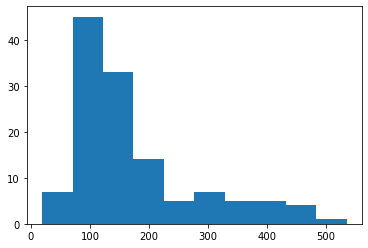

In [29]:
plt.hist(booster_r.feature_importances_ + booster_g.feature_importances_ + booster_b.feature_importances_ )

In [37]:
summed_importance = booster_r.feature_importances_ + booster_g.feature_importances_ + booster_b.feature_importances_ 

In [40]:
np.array(CHEMICAL_FEATURES)[np.where(~(summed_importance < 100))[0]]

array(['f-lig-chi-0', 'f-lig-chi-1', 'f-lig-chi-2', 'f-lig-chi-3',
       'f-lig-Z-0', 'f-lig-Z-1', 'f-lig-Z-2', 'f-lig-Z-3', 'f-lig-I-1',
       'f-lig-I-2', 'f-lig-I-3', 'f-lig-T-0', 'f-lig-T-1', 'f-lig-T-2',
       'f-lig-T-3', 'f-lig-S-0', 'f-lig-S-1', 'f-lig-S-2', 'f-lig-S-3',
       'lc-chi-0-all', 'lc-chi-1-all', 'lc-chi-2-all', 'lc-chi-3-all',
       'lc-Z-0-all', 'lc-Z-1-all', 'lc-Z-2-all', 'lc-Z-3-all',
       'lc-I-0-all', 'lc-I-1-all', 'lc-I-2-all', 'lc-I-3-all',
       'lc-T-0-all', 'lc-T-2-all', 'lc-S-1-all', 'lc-S-2-all',
       'lc-alpha-2-all', 'lc-alpha-3-all', 'D_lc-chi-0-all',
       'D_lc-chi-1-all', 'D_lc-Z-1-all', 'D_lc-I-1-all', 'D_lc-I-2-all',
       'D_lc-I-3-all', 'D_lc-T-0-all', 'D_lc-T-1-all', 'D_lc-T-2-all',
       'D_lc-T-3-all', 'D_lc-S-0-all', 'D_lc-S-1-all', 'D_lc-S-2-all',
       'D_lc-S-3-all', 'D_lc-alpha-0-all', 'D_lc-alpha-1-all',
       'D_lc-alpha-2-all', 'D_lc-alpha-3-all', 'mc_CRY-chi-0-all',
       'mc_CRY-chi-1-all', 'mc_CRY-chi-2-all', 'mc_